## Segmentación de clientes

## Librerías

In [206]:
# Librerías para visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías para manipulación y análisis de datos
import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

from toolbox_DS import *

import warnings
warnings.filterwarnings('ignore')
pd.option_context('mode.use_inf_as_na', True)


## Funciones

In [207]:
def crear_grafico_radar(stats, etiquetas, titulo):
    """
    Crea y muestra un gráfico de radar con las estadísticas y etiquetas proporcionadas.
    
    Parámetros:
    - stats: Lista de estadísticas para cada variable.
    - etiquetas: Lista de etiquetas para cada eje del gráfico de radar.
    """
    # Número de variables que estamos graficando.
    num_vars = len(stats)
    
    # Dividir el círculo y calcular los ángulos necesarios para representar cada eje.
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    
    # El gráfico es circular, por lo que necesitamos cerrar el círculo y los ángulos deben completarse.
    stats += stats[:1]
    angles += angles[:1]
    
    # Iniciar el gráfico de radar.
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    
    # Dibujar una línea alrededor del gráfico de radar.
    ax.fill(angles, stats, color='red', alpha=0.25)
    
    # Dibujar las líneas de los ejes.
    ax.plot(angles, stats, color='red', linewidth=2)

    ax.set_title(titulo)
    
    # Establecer las etiquetas para los ejes.
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(etiquetas)
    
    # Mostrar el gráfico.
    plt.show()


def crear_grafico_radar_multiples(stats_list, etiquetas, colores, titulo, leyenda):
    """
    Crea y muestra un gráfico de radar con múltiples conjuntos de estadísticas.
    
    Parámetros:
    - stats_list: Lista de listas de estadísticas para cada conjunto de datos.
    - etiquetas: Lista de etiquetas para cada eje del gráfico de radar.
    - colores: Lista de colores para cada conjunto de datos.
    - titulo: Título del gráfico.
    """
    # Número de variables que estamos graficando.
    num_vars = len(etiquetas)
    
    # Dividir el círculo y calcular los ángulos necesarios para representar cada eje.
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Completar el círculo
    
    # Iniciar el gráfico de radar.
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    
    # Graficar cada conjunto de estadísticas en el gráfico de radar.
    for stats, color in zip(stats_list, colores):
        stats += stats[:1]  # Completar el círculo
        ax.fill(angles, stats, color=color, alpha=0.25)
        ax.plot(angles, stats, color=color, linewidth=2)
    
    # Establecer las etiquetas para los ejes.
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(etiquetas)
    
    # Añadir un título
    plt.title(titulo, size=20, color='black', y=1.1)
    
    # Mostrar el gráfico.
    plt.show()


## Carga de datos (train_set)

In [208]:
train_set = pd.read_csv('./data/train_set.csv')
train_set

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Response,income_missing,age,customes_seniority,Household_members,Total_amount,Total_purchase,Median_amount_purchase,Total_cmp,Total_%_cmp
0,5675,1960,PhD,Divorced,50611.0,0,1,2012-10-04,98,459,...,0,0,55,3,2.0,493,22,22.409091,1,0.2
1,5543,1966,Graduation,Together,57811.0,0,1,2013-06-24,49,545,...,0,0,49,2,3.0,802,25,32.080000,1,0.2
2,3011,1965,Graduation,Married,69139.0,0,1,2014-01-27,23,86,...,0,0,50,1,3.0,227,11,20.636364,0,0.0
3,535,1987,Graduation,Divorced,81361.0,0,0,2014-02-25,18,163,...,0,0,28,1,1.0,778,27,28.814815,0,0.0
4,10755,1976,2n Cycle,Married,23718.0,1,0,2013-09-02,76,6,...,0,0,39,2,3.0,81,9,9.000000,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1785,5320,1973,Master,Divorced,44051.0,1,1,2013-01-29,20,79,...,1,0,42,2,3.0,171,12,14.250000,0,0.0
1786,2894,1985,Graduation,Single,72903.0,0,0,2013-10-29,74,1067,...,1,0,30,2,1.0,2013,21,95.857143,3,0.6
1787,1726,1970,Graduation,Single,22585.0,0,0,2013-03-18,23,3,...,1,0,45,2,1.0,81,5,16.200000,1,0.2
1788,6905,1994,Graduation,Together,80685.0,0,0,2012-08-22,55,241,...,0,0,21,3,2.0,1004,21,47.809524,0,0.0


In [209]:
train_set.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'income_missing', 'age',
       'customes_seniority', 'Household_members', 'Total_amount',
       'Total_purchase', 'Median_amount_purchase', 'Total_cmp', 'Total_%_cmp'],
      dtype='object')

In [210]:
# Cambio el índice
train_set.set_index('ID', inplace=True)

# Cambio tipo a datetime
train_set['Dt_Customer'] = pd.to_datetime(train_set['Dt_Customer'])

# Cambiar tipo a categóricas
cols_to_category = ['Education', 'Marital_Status']
train_set[cols_to_category] = train_set[cols_to_category].astype('category')

# Elimino columna 'income_missing'
train_set = train_set.drop(columns=['income_missing', 'Year_Birth','Total_%_cmp','Dt_Customer','Median_amount_purchase'])

# Elimino el outlier de Income
train_set = train_set.loc[train_set['Income'] !=666666]

## Tratamiento de variables

Selección de features por dtype

In [211]:
features_num = train_set.select_dtypes(['int','float']).columns
features_cat = train_set.select_dtypes(['object', 'category']).columns
print('features_num', features_num)
print('features_cat', features_cat)

features_num Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'age', 'customes_seniority',
       'Household_members', 'Total_amount', 'Total_purchase', 'Total_cmp'],
      dtype='object')
features_cat Index(['Education', 'Marital_Status'], dtype='object')


Preparación de las transformaciones

In [212]:
# Definimos el OrdinalEncoder con el mapeo de 'education_ode'
ordinal_encoder = OrdinalEncoder(categories=[['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD']])

categorical_features_onehot = ['Marital_Status']
categorical_features_ordinal = ['Education']
numerical_features = features_num

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat_onehot', OneHotEncoder(), categorical_features_onehot),
        ('cat_ordinal', Pipeline([
            ('ordinal', ordinal_encoder),
            ('scaler', MinMaxScaler())
        ]), categorical_features_ordinal)
    ]
)

## Clusterización

Primera valoración del KMeans con un rango entre 3 y 7 clúster

In [214]:
soluciones = list(range(2, 6))

codo = []
silueta = []
calins = []
davies = []

for solucion in soluciones:
    
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('kmeans', KMeans(random_state=42, n_clusters=solucion, n_init=10))
    ])
    
   
    pipeline.fit(train_set)
    
    # Obtenemos los datos transformados del paso 'preprocessor'
    X_transformed = pipeline.named_steps['preprocessor'].transform(train_set)
    
    # Obtenemos las etiquetas del cluster del paso 'kmeans'
    labels = pipeline.named_steps['kmeans'].labels_
    
    # Recoger las métricas usando los datos transformados
    codo.append(pipeline.named_steps['kmeans'].inertia_)
    silueta.append(silhouette_score(X_transformed, labels))
    calins.append(calinski_harabasz_score(X_transformed, labels))
    davies.append(davies_bouldin_score(X_transformed, labels))

Resultados a dataframe y visualización gráfica

In [215]:
metricas = pd.DataFrame({'Solucion':soluciones,
              'Codo': codo,
              'Silueta':silueta,
              'Calins':calins,           
              'Davies':davies}).set_index('Solucion')

metricas

,Codo,Silueta,Calins,Davies
Solucion,,,,
2,2.636322e+11,0.606243,3936.333294,0.523995
3,1.516855e+11,0.543002,4077.848251,0.554045
4,1.019887e+11,0.528716,4330.924292,0.567650
5,6.659411e+10,0.536339,5208.929714,0.461499


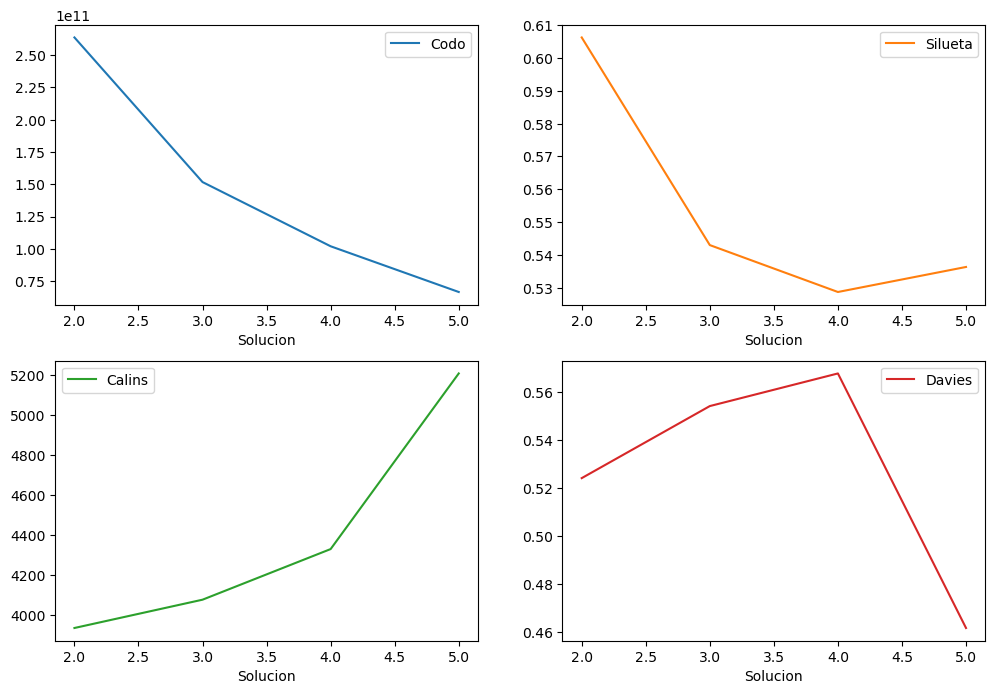

In [216]:
metricas.plot(subplots = True, figsize = (12,8), layout = (2,2), sharex = False);

Parece que estaría entre 4 y 5 sería el mejor número para los clúster.

In [217]:
k =2
# Instanciar el pipeline con el preprocesador y KMeans
pipeline = Pipeline(steps=[
       ('preprocessor', preprocessor),
       ('kmeans', KMeans(random_state=42, n_clusters=k, n_init=10))
   ])
    
# Entrenar el pipeline
pipeline.fit(train_set)
    
# Obtenemos los datos transformados del paso 'preprocessor'
X_transformed = pipeline.named_steps['preprocessor'].transform(train_set)
    
# Obtenemos las etiquetas del cluster del paso 'kmeans'
labels = pipeline.named_steps['kmeans'].labels_

# Si deseas añadir las etiquetas de los clusters al DataFrame original
train_set['Cluster'] = labels

In [218]:
train_set['Cluster'].value_counts()

Cluster
1    911
0    878
Name: count, dtype: int64

Elijo 4 dado que con 5 se me queda un último clúster muy pequeño (solo 7 personas)

## Análisis clúster con respecto a las variables

### Análisis con variables numéricas

Análisis de Income vs Cluster
****************************************


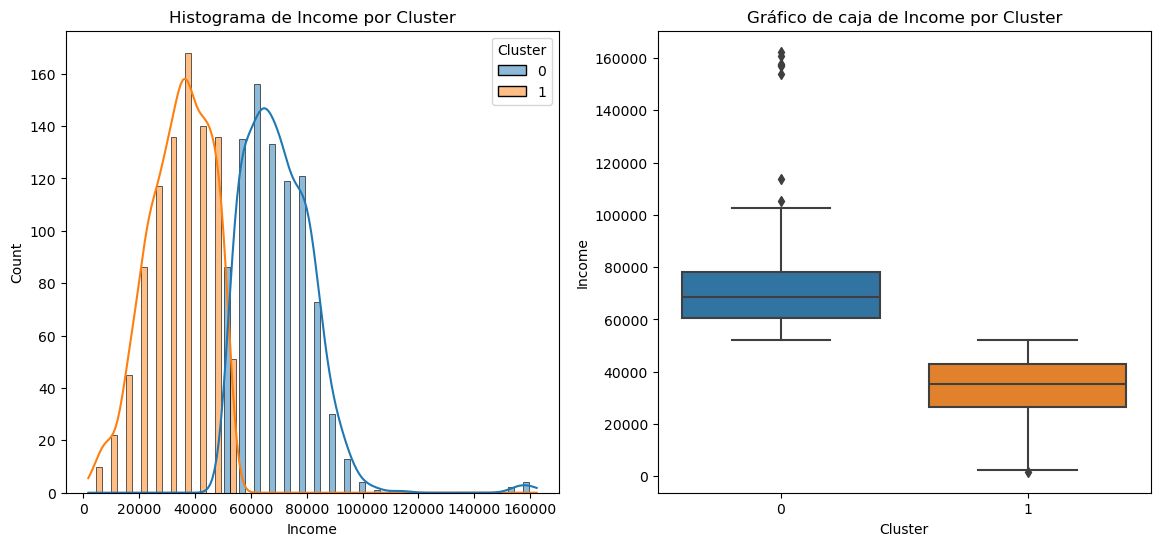

Estadísticos de resumen para Income por Cluster:
         count      mean       std      min      25%      50%       75%  \
Cluster                                                                   
0        878.0  70123.54  13146.81  52157.0  60605.5  68719.0  77978.75   
1        911.0  34099.12  11073.93   1730.0  26488.5  35178.0  42854.00   

              max  
Cluster            
0        162397.0  
1         52074.0  

Prueba t-student para Income:
Estadístico t: -62.77
p-valor: 0.000
La variable Income está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de Kidhome vs Cluster
****************************************


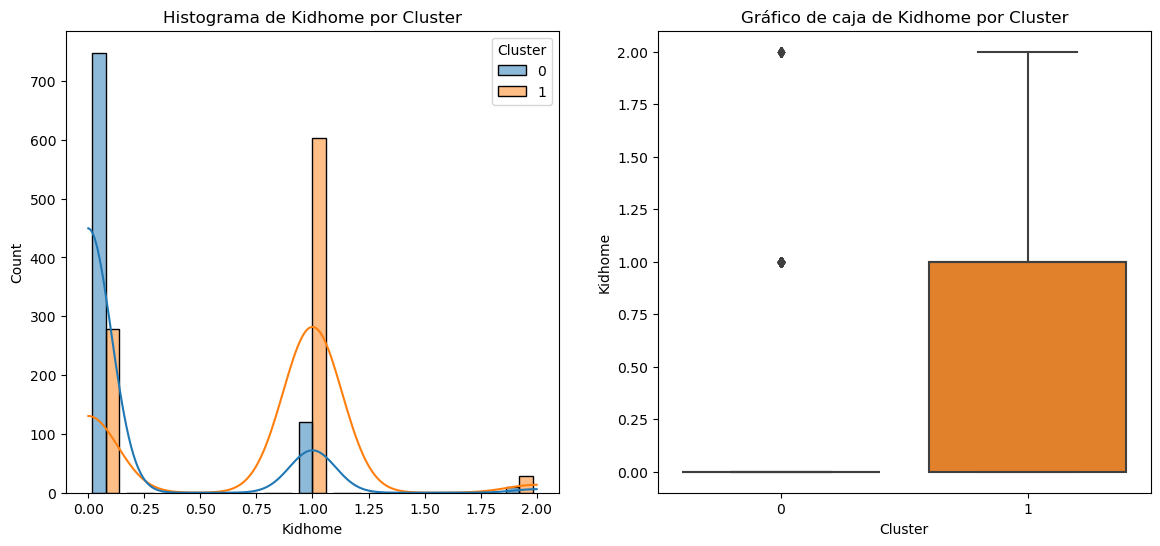

Estadísticos de resumen para Kidhome por Cluster:
         count  mean   std  min  25%  50%  75%  max
Cluster                                            
0        878.0  0.16  0.40  0.0  0.0  0.0  0.0  2.0
1        911.0  0.73  0.51  0.0  0.0  1.0  1.0  2.0

Prueba t-student para Kidhome:
Estadístico t: 26.06
p-valor: 0.000
La variable Kidhome está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de Teenhome vs Cluster
****************************************


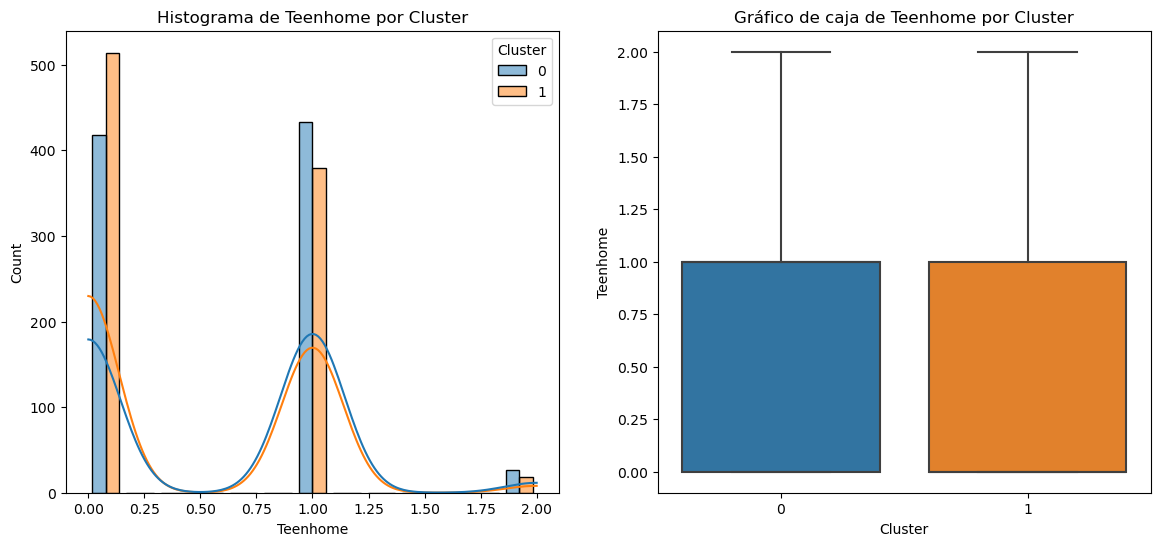

Estadísticos de resumen para Teenhome por Cluster:
         count  mean   std  min  25%  50%  75%  max
Cluster                                            
0        878.0  0.55  0.56  0.0  0.0  1.0  1.0  2.0
1        911.0  0.46  0.54  0.0  0.0  0.0  1.0  2.0

Prueba t-student para Teenhome:
Estadístico t: -3.84
p-valor: 0.000
La variable Teenhome está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de Recency vs Cluster
****************************************


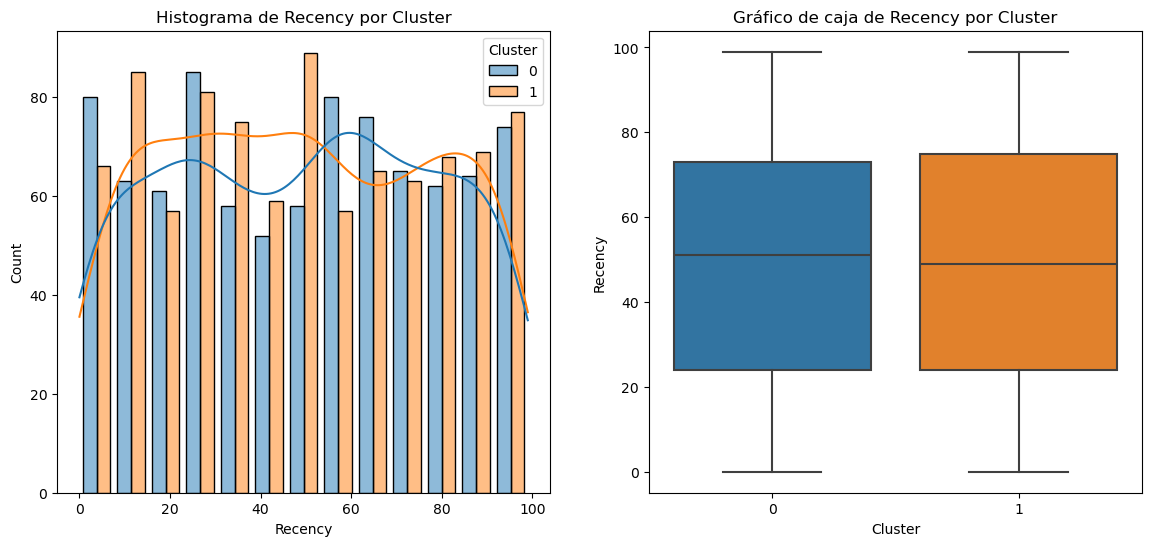

Estadísticos de resumen para Recency por Cluster:
         count   mean    std  min   25%   50%   75%   max
Cluster                                                  
0        878.0  49.12  29.18  0.0  24.0  51.0  73.0  99.0
1        911.0  49.00  28.83  0.0  24.0  49.0  75.0  99.0

Prueba t-student para Recency:
Estadístico t: -0.08
p-valor: 0.932
La variable Recency no está significativamente asociada con Cluster (p >= 0.05).

Análisis de MntWines vs Cluster
****************************************


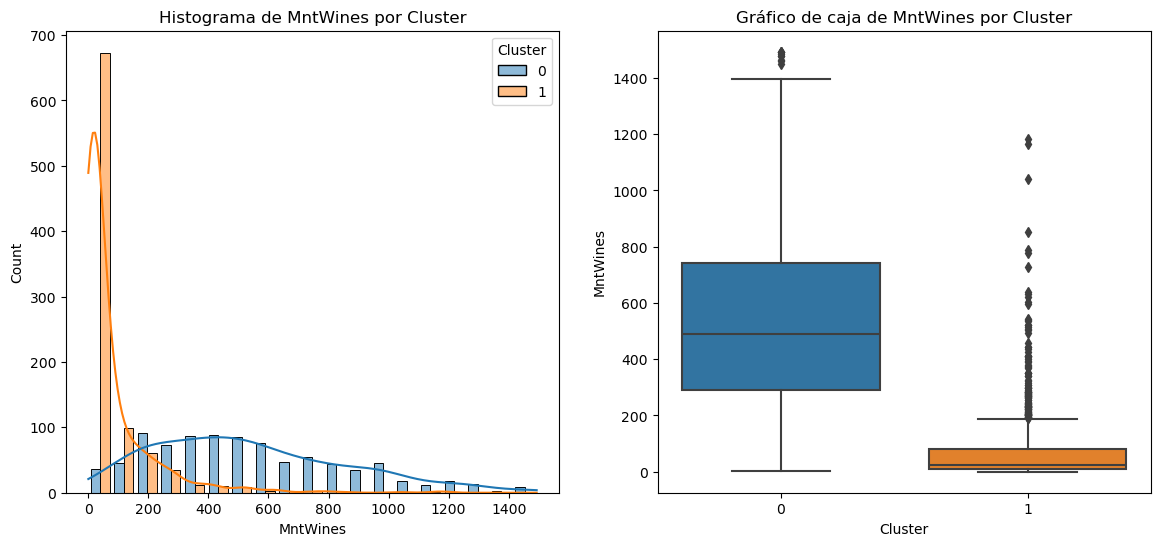

Estadísticos de resumen para MntWines por Cluster:
         count    mean     std  min     25%    50%    75%     max
Cluster                                                          
0        878.0  538.17  324.00  1.0  291.25  491.0  742.5  1493.0
1        911.0   76.84  130.72  0.0    9.00   25.0   81.0  1181.0

Prueba t-student para MntWines:
Estadístico t: -39.75
p-valor: 0.000
La variable MntWines está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de MntFruits vs Cluster
****************************************


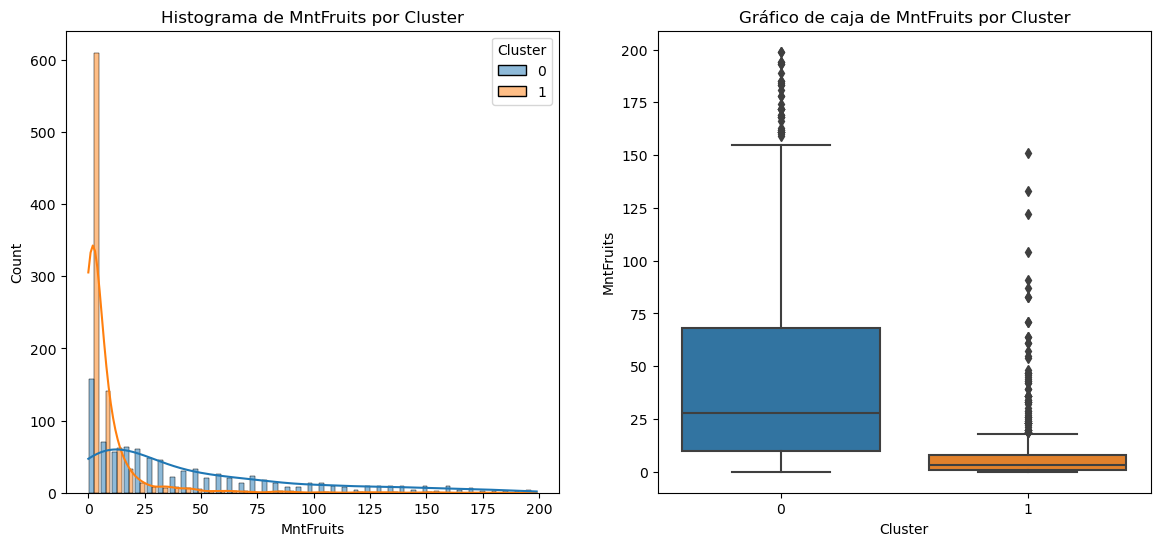

Estadísticos de resumen para MntFruits por Cluster:
         count   mean    std  min   25%   50%   75%    max
Cluster                                                   
0        878.0  46.07  47.34  0.0  10.0  28.0  68.0  199.0
1        911.0   7.05  13.75  0.0   1.0   3.0   8.0  151.0

Prueba t-student para MntFruits:
Estadístico t: -23.85
p-valor: 0.000
La variable MntFruits está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de MntMeatProducts vs Cluster
****************************************


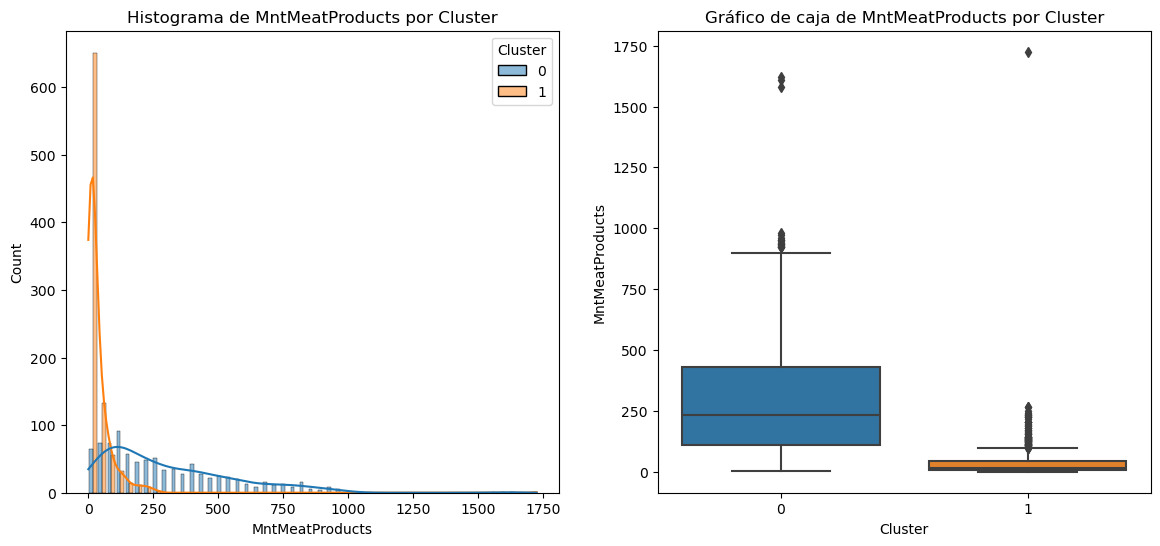

Estadísticos de resumen para MntMeatProducts por Cluster:
         count    mean     std  min    25%    50%     75%     max
Cluster                                                          
0        878.0  300.88  247.64  1.0  108.0  231.0  431.75  1622.0
1        911.0   36.57   71.41  0.0    9.0   17.0   44.00  1725.0

Prueba t-student para MntMeatProducts:
Estadístico t: -30.91
p-valor: 0.000
La variable MntMeatProducts está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de MntFishProducts vs Cluster
****************************************


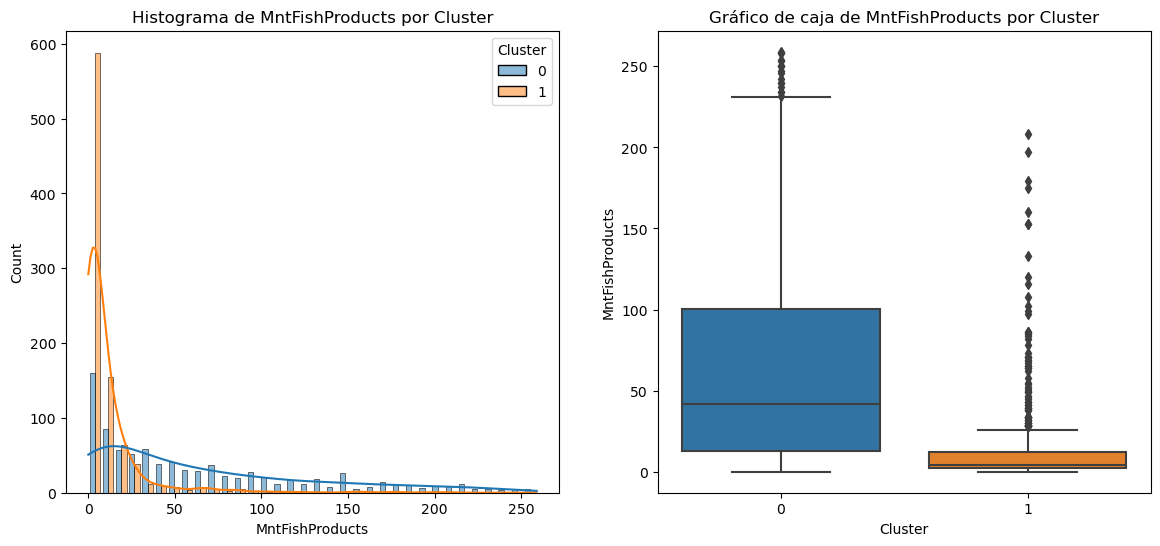

Estadísticos de resumen para MntFishProducts por Cluster:
         count   mean    std  min   25%   50%    75%    max
Cluster                                                    
0        878.0  65.42  64.96  0.0  13.0  42.0  100.5  259.0
1        911.0  11.02  21.77  0.0   2.0   4.0   12.0  208.0

Prueba t-student para MntFishProducts:
Estadístico t: -23.92
p-valor: 0.000
La variable MntFishProducts está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de MntSweetProducts vs Cluster
****************************************


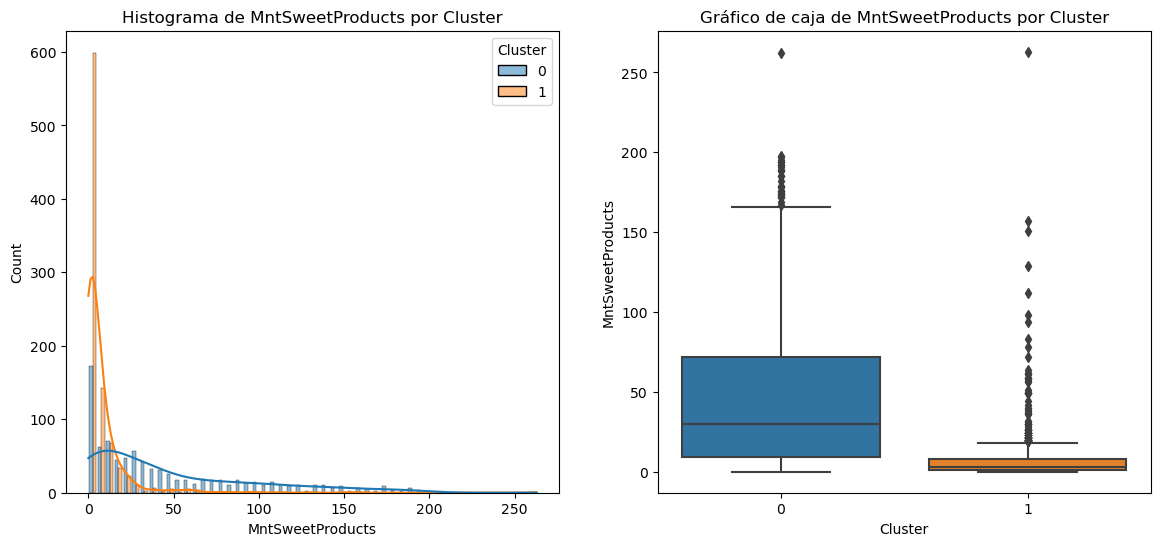

Estadísticos de resumen para MntSweetProducts por Cluster:
         count   mean    std  min  25%   50%   75%    max
Cluster                                                  
0        878.0  47.11  49.24  0.0  9.0  30.0  72.0  262.0
1        911.0   7.44  16.49  0.0  1.0   3.0   8.0  263.0

Prueba t-student para MntSweetProducts:
Estadístico t: -23.01
p-valor: 0.000
La variable MntSweetProducts está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de MntGoldProds vs Cluster
****************************************


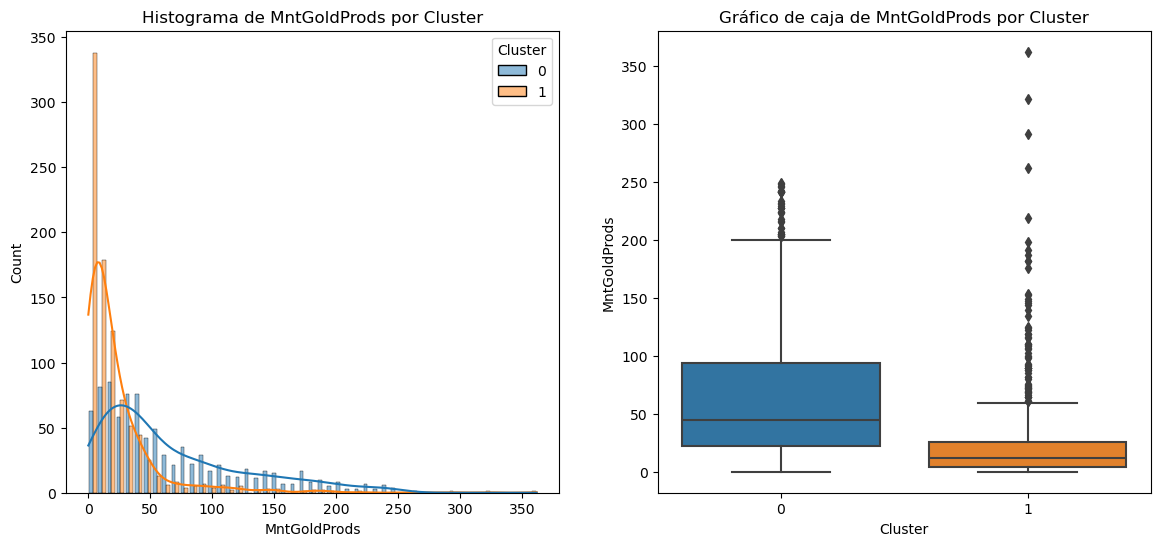

Estadísticos de resumen para MntGoldProds por Cluster:
         count   mean    std  min   25%   50%    75%    max
Cluster                                                    
0        878.0  65.63  58.06  0.0  22.0  44.5  93.75  249.0
1        911.0  22.43  34.52  0.0   4.0  12.0  26.00  362.0

Prueba t-student para MntGoldProds:
Estadístico t: -19.21
p-valor: 0.000
La variable MntGoldProds está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de NumDealsPurchases vs Cluster
****************************************


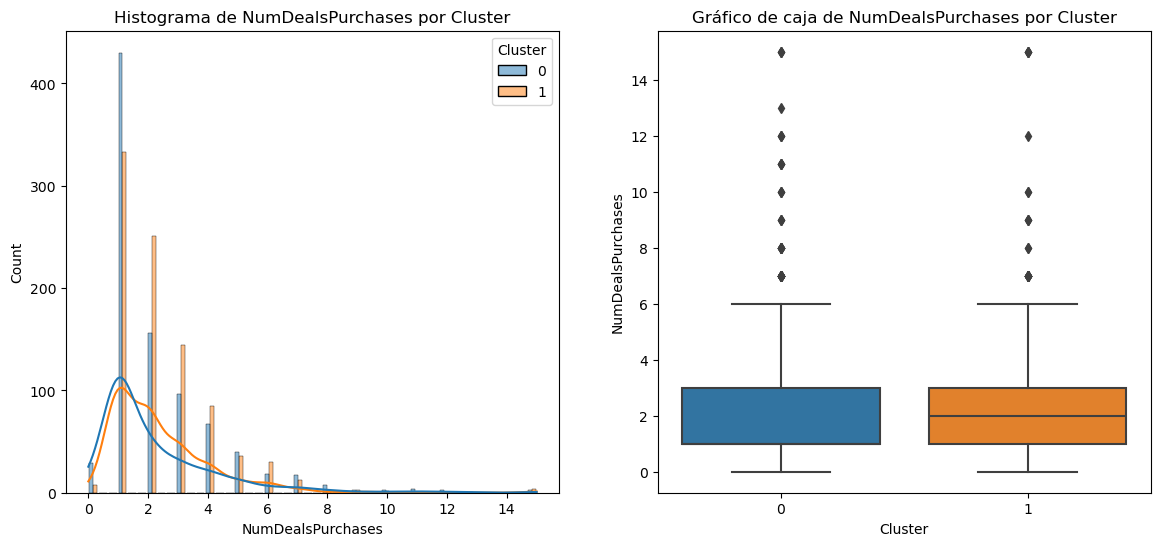

Estadísticos de resumen para NumDealsPurchases por Cluster:
         count  mean   std  min  25%  50%  75%   max
Cluster                                             
0        878.0  2.26  2.08  0.0  1.0  1.0  3.0  15.0
1        911.0  2.40  1.79  0.0  1.0  2.0  3.0  15.0

Prueba t-student para NumDealsPurchases:
Estadístico t: 1.52
p-valor: 0.128
La variable NumDealsPurchases no está significativamente asociada con Cluster (p >= 0.05).

Análisis de NumWebPurchases vs Cluster
****************************************


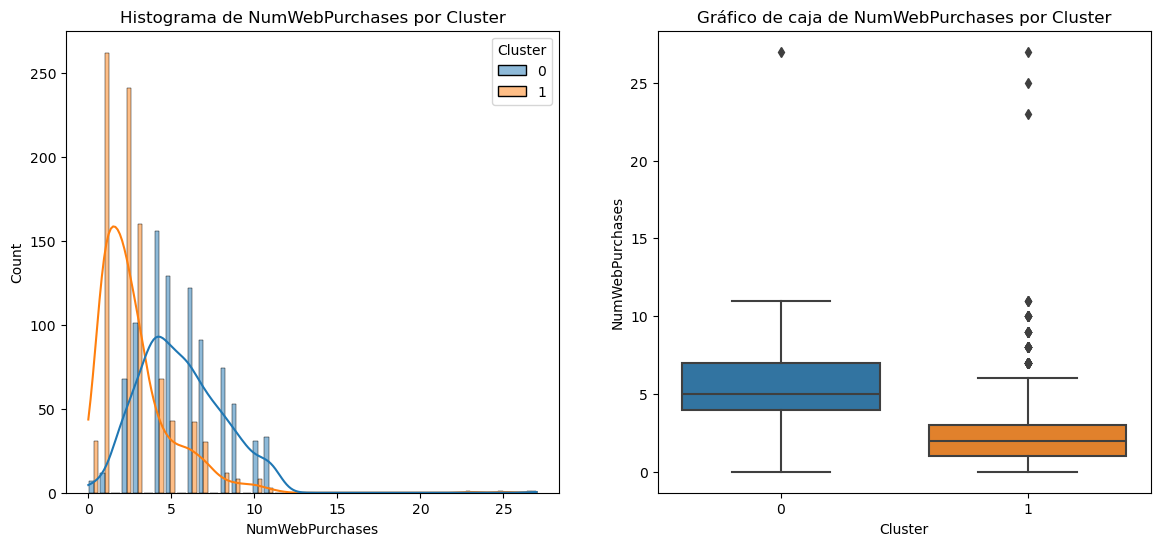

Estadísticos de resumen para NumWebPurchases por Cluster:
         count  mean   std  min  25%  50%  75%   max
Cluster                                             
0        878.0  5.53  2.56  0.0  4.0  5.0  7.0  27.0
1        911.0  2.78  2.40  0.0  1.0  2.0  3.0  27.0

Prueba t-student para NumWebPurchases:
Estadístico t: -23.51
p-valor: 0.000
La variable NumWebPurchases está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de NumCatalogPurchases vs Cluster
****************************************


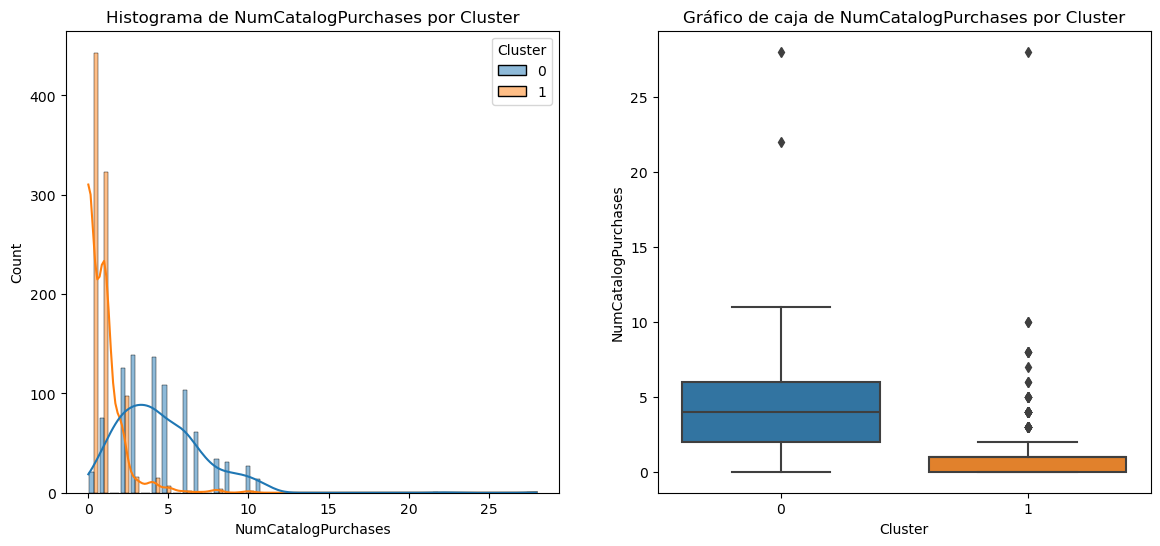

Estadísticos de resumen para NumCatalogPurchases por Cluster:
         count  mean   std  min  25%  50%  75%   max
Cluster                                             
0        878.0  4.44  2.71  0.0  2.0  4.0  6.0  28.0
1        911.0  0.83  1.48  0.0  0.0  1.0  1.0  28.0

Prueba t-student para NumCatalogPurchases:
Estadístico t: -35.16
p-valor: 0.000
La variable NumCatalogPurchases está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de NumStorePurchases vs Cluster
****************************************


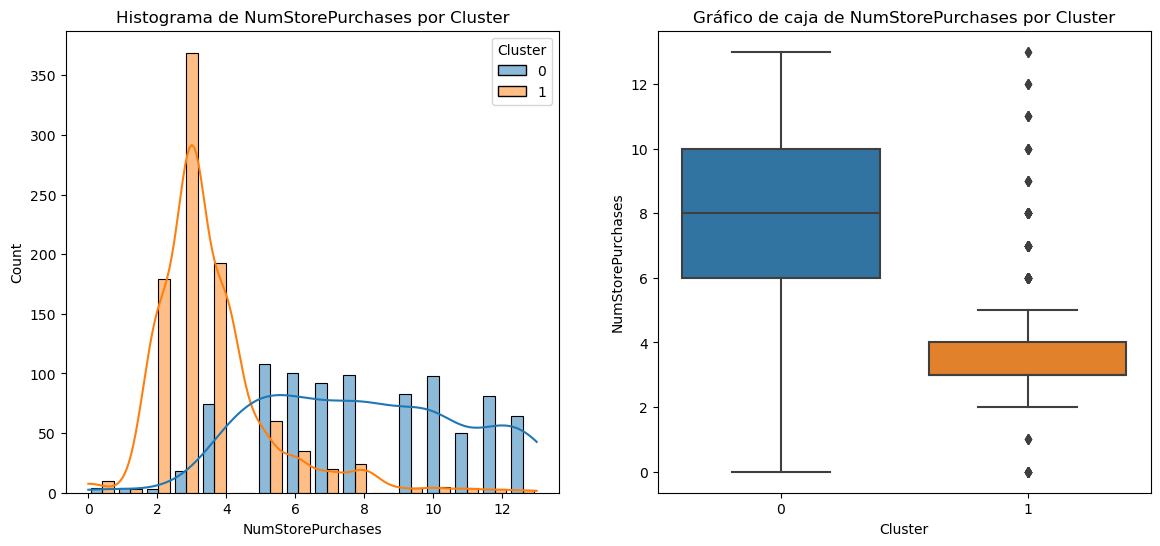

Estadísticos de resumen para NumStorePurchases por Cluster:
         count  mean   std  min  25%  50%   75%   max
Cluster                                              
0        878.0  7.99  2.92  0.0  6.0  8.0  10.0  13.0
1        911.0  3.59  1.73  0.0  3.0  3.0   4.0  13.0

Prueba t-student para NumStorePurchases:
Estadístico t: -38.94
p-valor: 0.000
La variable NumStorePurchases está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de NumWebVisitsMonth vs Cluster
****************************************


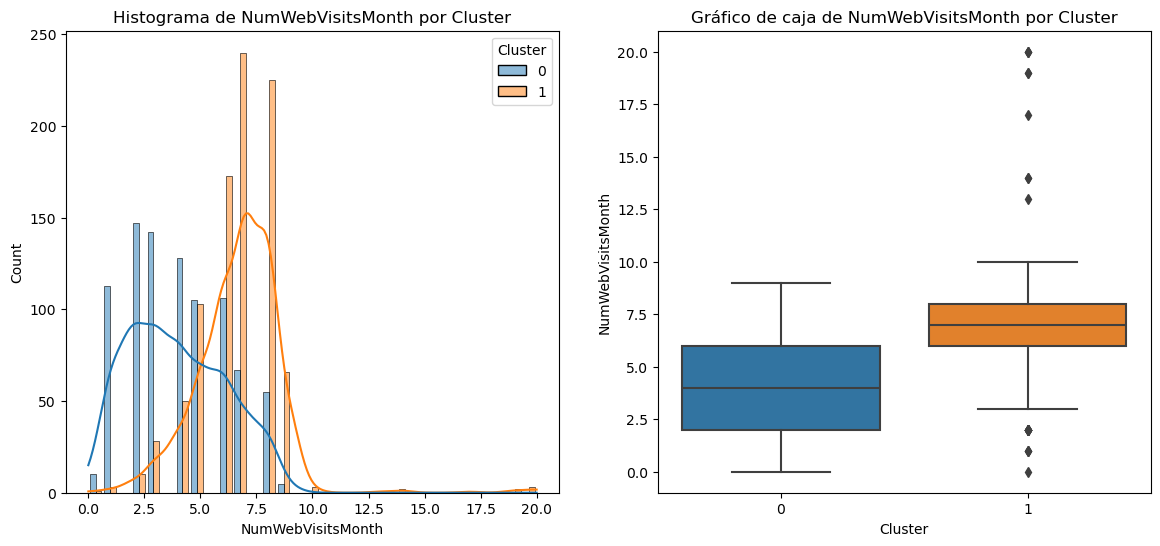

Estadísticos de resumen para NumWebVisitsMonth por Cluster:
         count  mean   std  min  25%  50%  75%   max
Cluster                                             
0        878.0  3.94  2.15  0.0  2.0  4.0  6.0   9.0
1        911.0  6.72  1.92  0.0  6.0  7.0  8.0  20.0

Prueba t-student para NumWebVisitsMonth:
Estadístico t: 28.85
p-valor: 0.000
La variable NumWebVisitsMonth está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de AcceptedCmp3 vs Cluster
****************************************


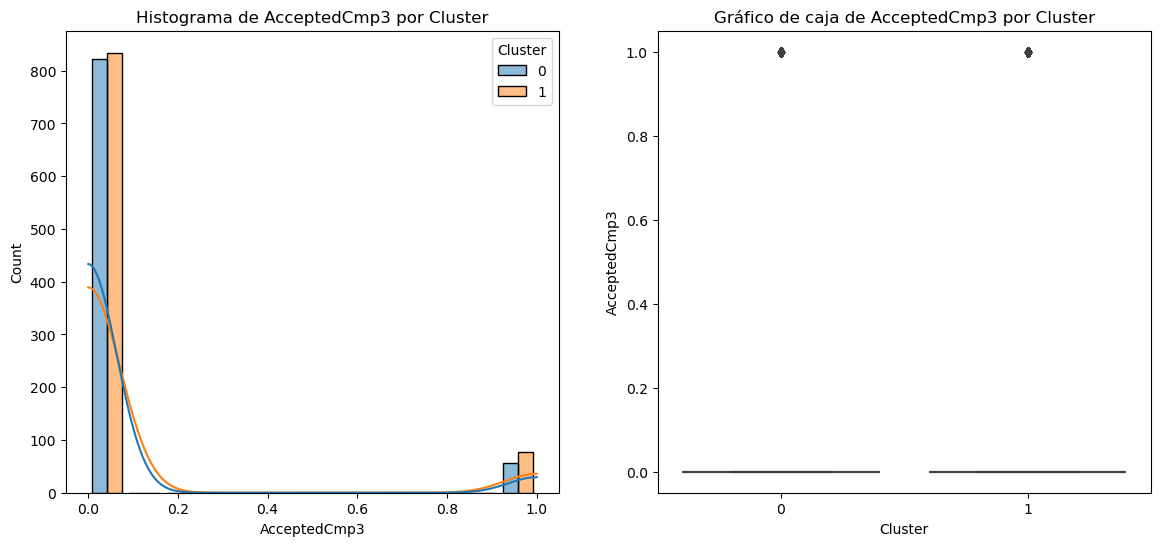

Estadísticos de resumen para AcceptedCmp3 por Cluster:
         count  mean   std  min  25%  50%  75%  max
Cluster                                            
0        878.0  0.06  0.24  0.0  0.0  0.0  0.0  1.0
1        911.0  0.08  0.28  0.0  0.0  0.0  0.0  1.0

Prueba t-student para AcceptedCmp3:
Estadístico t: 1.67
p-valor: 0.095
La variable AcceptedCmp3 no está significativamente asociada con Cluster (p >= 0.05).

Análisis de AcceptedCmp4 vs Cluster
****************************************


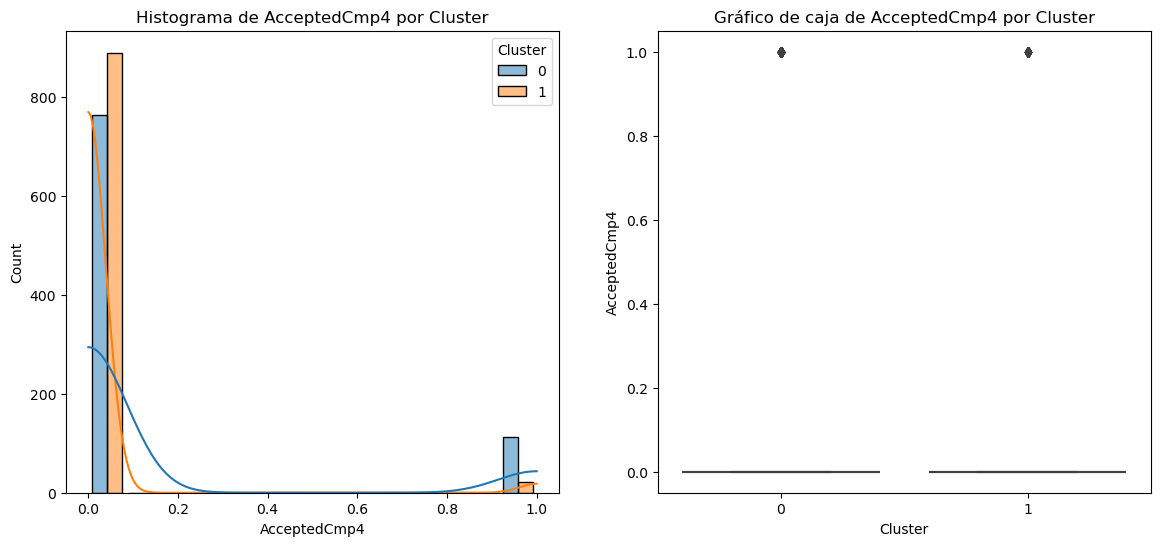

Estadísticos de resumen para AcceptedCmp4 por Cluster:
         count  mean   std  min  25%  50%  75%  max
Cluster                                            
0        878.0  0.13  0.34  0.0  0.0  0.0  0.0  1.0
1        911.0  0.02  0.15  0.0  0.0  0.0  0.0  1.0

Prueba t-student para AcceptedCmp4:
Estadístico t: -8.66
p-valor: 0.000
La variable AcceptedCmp4 está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de AcceptedCmp5 vs Cluster
****************************************


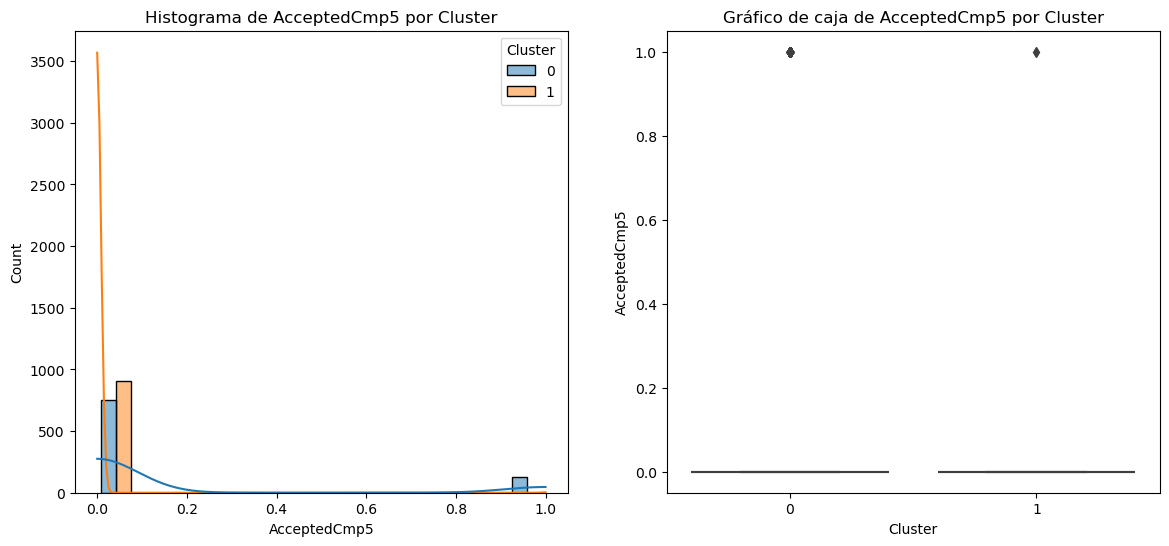

Estadísticos de resumen para AcceptedCmp5 por Cluster:
         count  mean   std  min  25%  50%  75%  max
Cluster                                            
0        878.0  0.14  0.35  0.0  0.0  0.0  0.0  1.0
1        911.0  0.00  0.03  0.0  0.0  0.0  0.0  1.0

Prueba t-student para AcceptedCmp5:
Estadístico t: -12.25
p-valor: 0.000
La variable AcceptedCmp5 está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de AcceptedCmp1 vs Cluster
****************************************


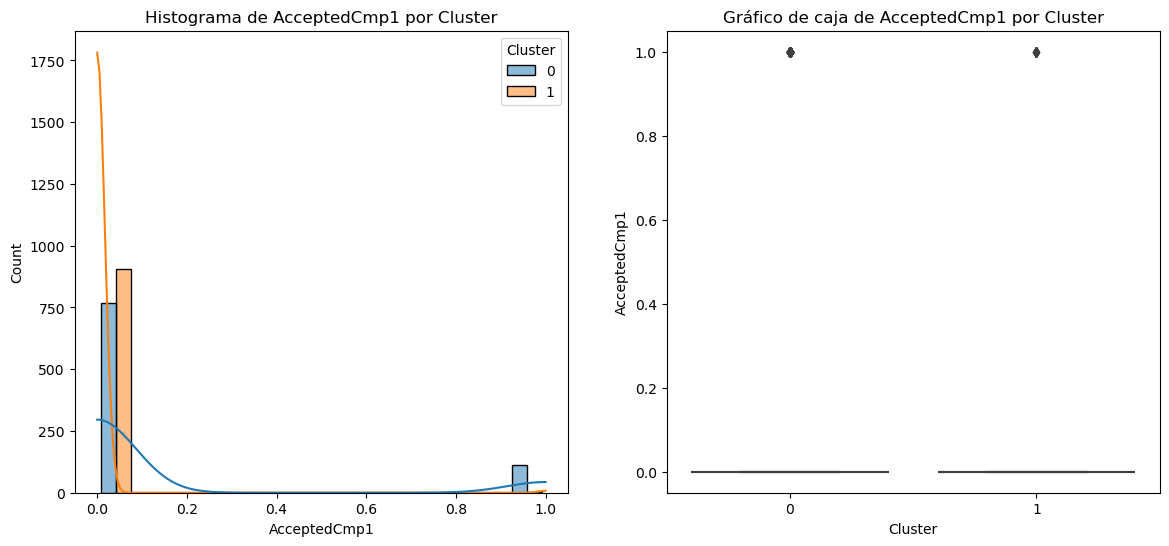

Estadísticos de resumen para AcceptedCmp1 por Cluster:
         count  mean   std  min  25%  50%  75%  max
Cluster                                            
0        878.0  0.13  0.33  0.0  0.0  0.0  0.0  1.0
1        911.0  0.00  0.07  0.0  0.0  0.0  0.0  1.0

Prueba t-student para AcceptedCmp1:
Estadístico t: -10.92
p-valor: 0.000
La variable AcceptedCmp1 está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de AcceptedCmp2 vs Cluster
****************************************


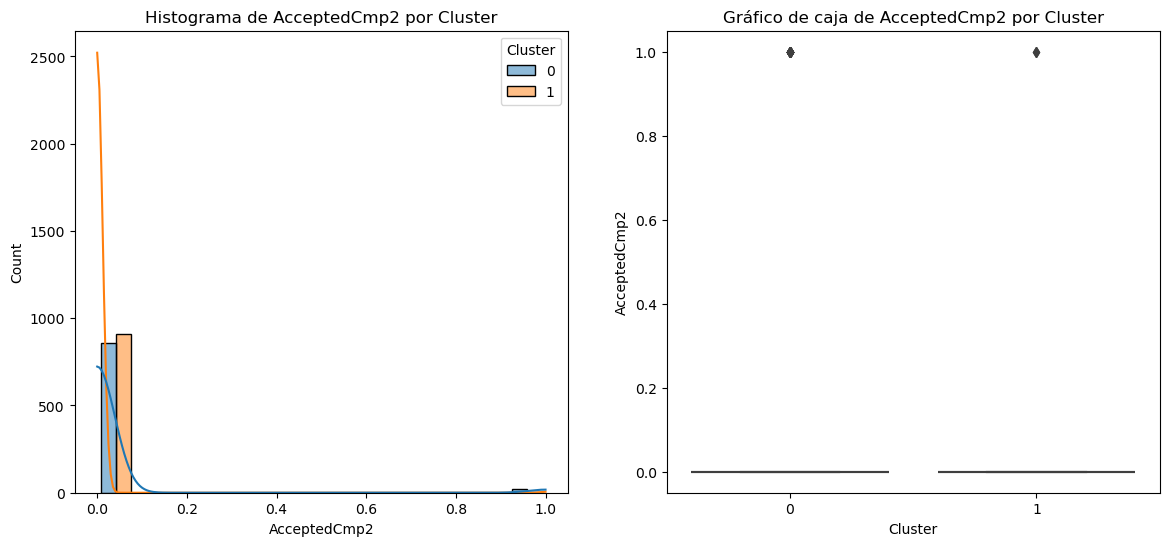

Estadísticos de resumen para AcceptedCmp2 por Cluster:
         count  mean   std  min  25%  50%  75%  max
Cluster                                            
0        878.0  0.02  0.15  0.0  0.0  0.0  0.0  1.0
1        911.0  0.00  0.05  0.0  0.0  0.0  0.0  1.0

Prueba t-student para AcceptedCmp2:
Estadístico t: -4.09
p-valor: 0.000
La variable AcceptedCmp2 está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de Complain vs Cluster
****************************************


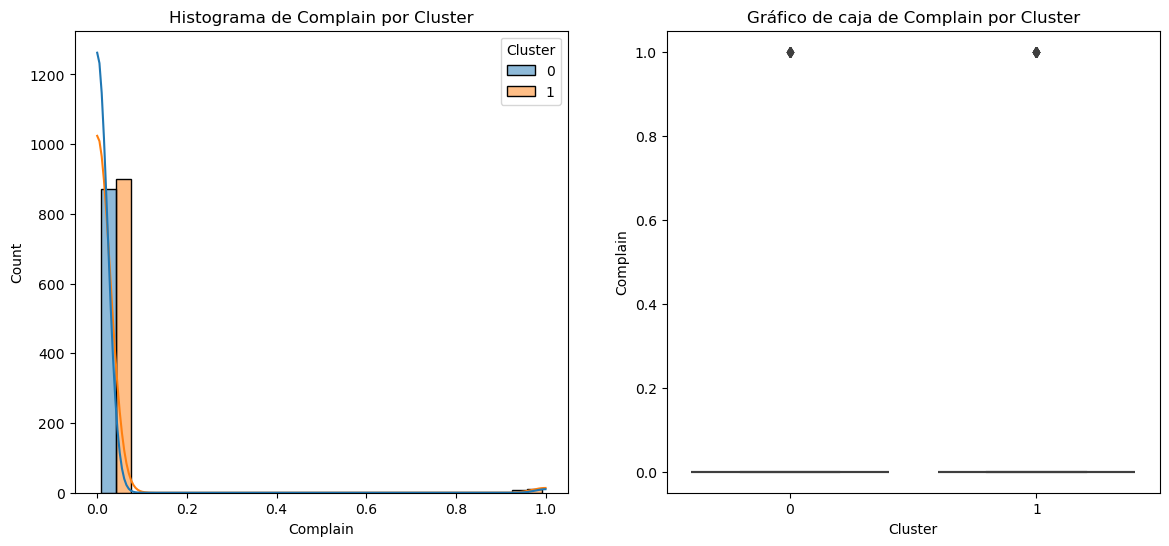

Estadísticos de resumen para Complain por Cluster:
         count  mean   std  min  25%  50%  75%  max
Cluster                                            
0        878.0  0.01  0.09  0.0  0.0  0.0  0.0  1.0
1        911.0  0.01  0.11  0.0  0.0  0.0  0.0  1.0

Prueba t-student para Complain:
Estadístico t: 1.07
p-valor: 0.284
La variable Complain no está significativamente asociada con Cluster (p >= 0.05).

Análisis de Response vs Cluster
****************************************


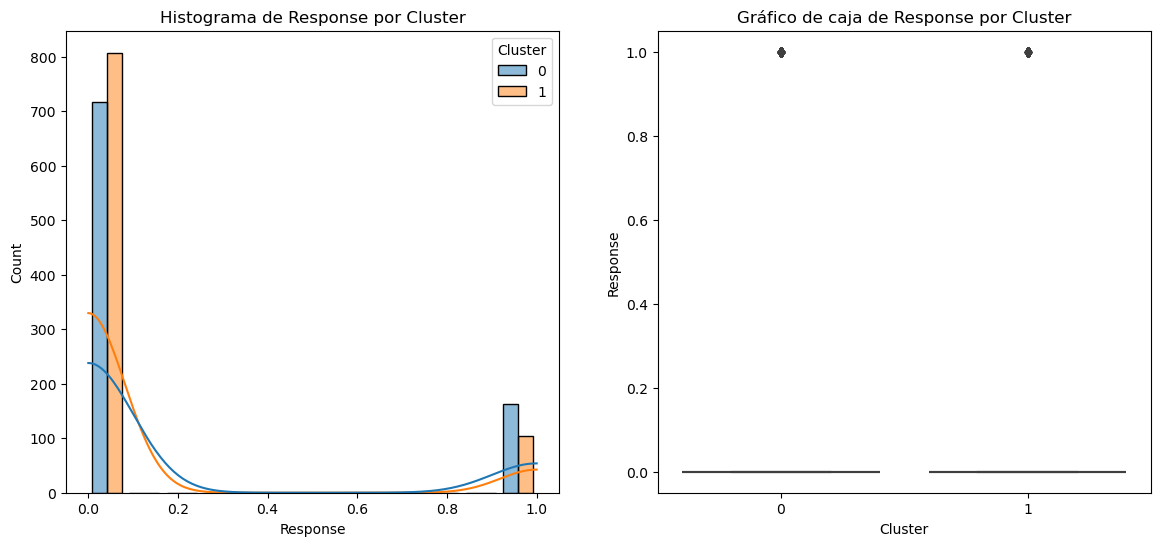

Estadísticos de resumen para Response por Cluster:
         count  mean   std  min  25%  50%  75%  max
Cluster                                            
0        878.0  0.18  0.39  0.0  0.0  0.0  0.0  1.0
1        911.0  0.11  0.32  0.0  0.0  0.0  0.0  1.0

Prueba t-student para Response:
Estadístico t: -4.20
p-valor: 0.000
La variable Response está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de age vs Cluster
****************************************


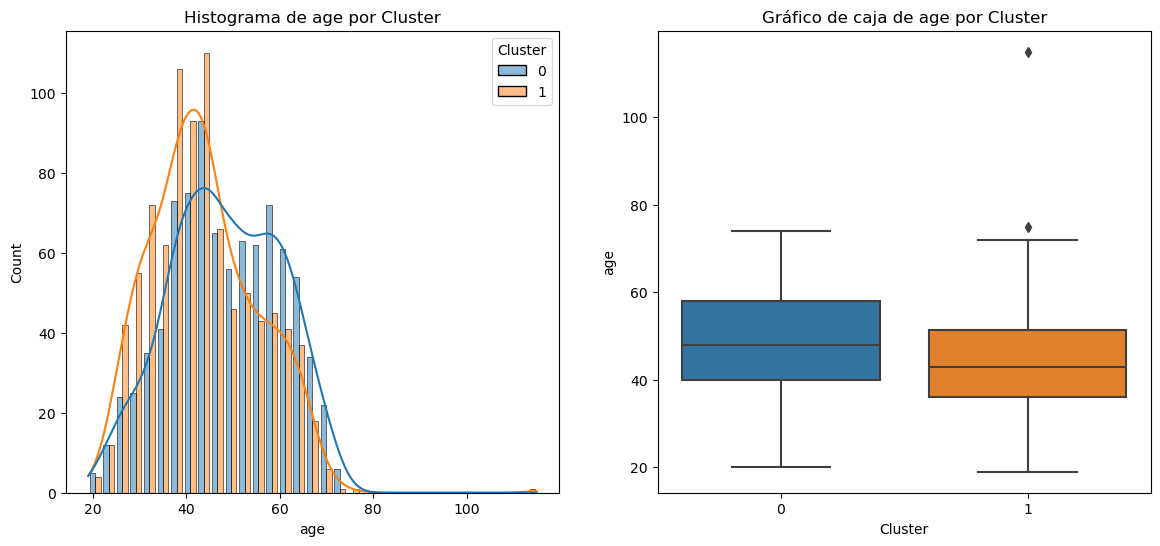

Estadísticos de resumen para age por Cluster:
         count   mean    std   min   25%   50%   75%    max
Cluster                                                    
0        878.0  48.25  11.77  20.0  40.0  48.0  58.0   74.0
1        911.0  43.77  11.43  19.0  36.0  43.0  51.5  115.0

Prueba t-student para age:
Estadístico t: -8.17
p-valor: 0.000
La variable age está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de customes_seniority vs Cluster
****************************************


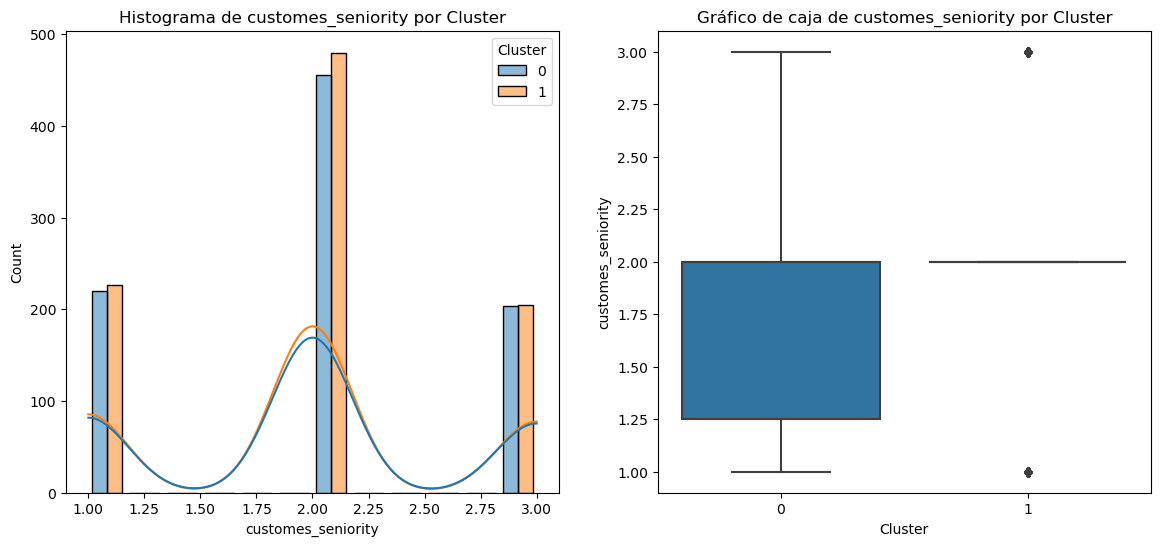

Estadísticos de resumen para customes_seniority por Cluster:
         count  mean   std  min   25%  50%  75%  max
Cluster                                             
0        878.0  1.98  0.69  1.0  1.25  2.0  2.0  3.0
1        911.0  1.98  0.69  1.0  2.00  2.0  2.0  3.0

Prueba t-student para customes_seniority:
Estadístico t: -0.11
p-valor: 0.910
La variable customes_seniority no está significativamente asociada con Cluster (p >= 0.05).

Análisis de Household_members vs Cluster
****************************************


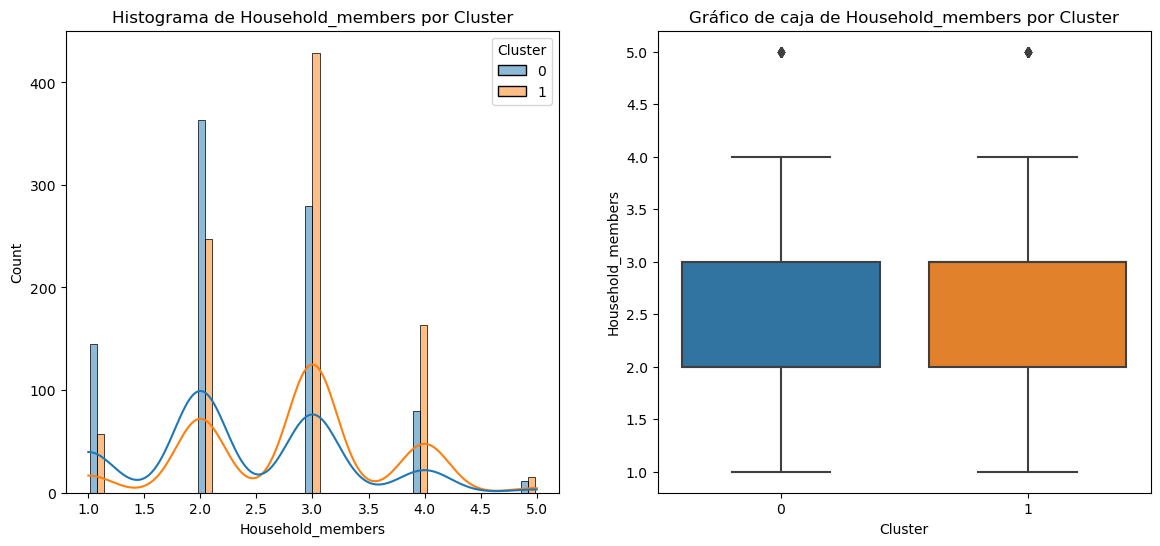

Estadísticos de resumen para Household_members por Cluster:
         count  mean   std  min  25%  50%  75%  max
Cluster                                            
0        878.0  2.37  0.91  1.0  2.0  2.0  3.0  5.0
1        911.0  2.82  0.86  1.0  2.0  3.0  3.0  5.0

Prueba t-student para Household_members:
Estadístico t: 10.63
p-valor: 0.000
La variable Household_members está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de Total_amount vs Cluster
****************************************


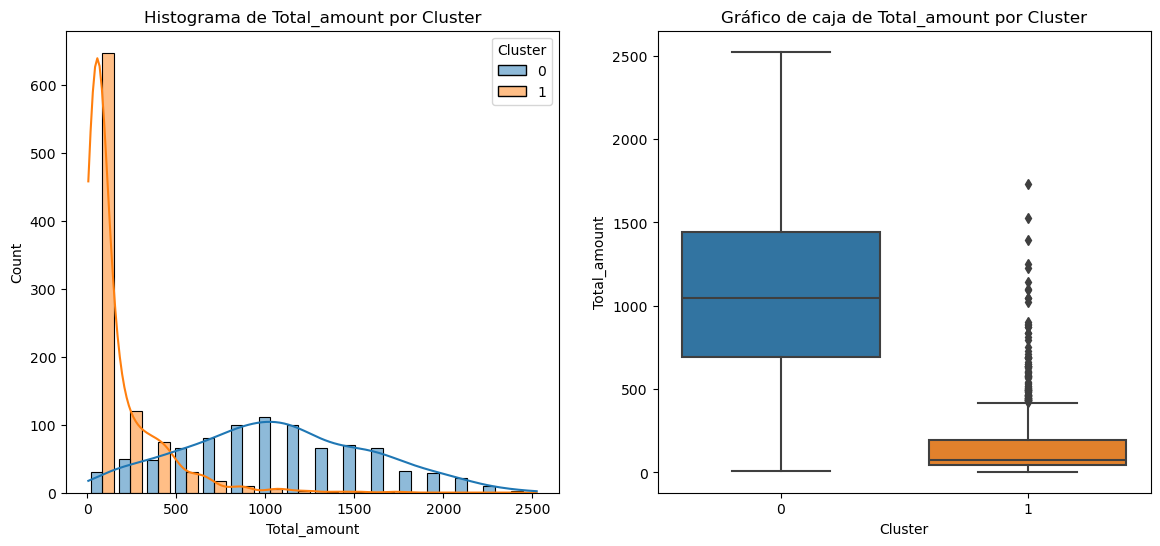

Estadísticos de resumen para Total_amount por Cluster:
         count     mean    std  min     25%     50%     75%     max
Cluster                                                            
0        878.0  1063.28  521.0  6.0  693.25  1043.5  1441.5  2524.0
1        911.0   161.36  207.4  5.0   42.50    73.0   195.0  1730.0

Prueba t-student para Total_amount:
Estadístico t: -48.42
p-valor: 0.000
La variable Total_amount está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de Total_purchase vs Cluster
****************************************


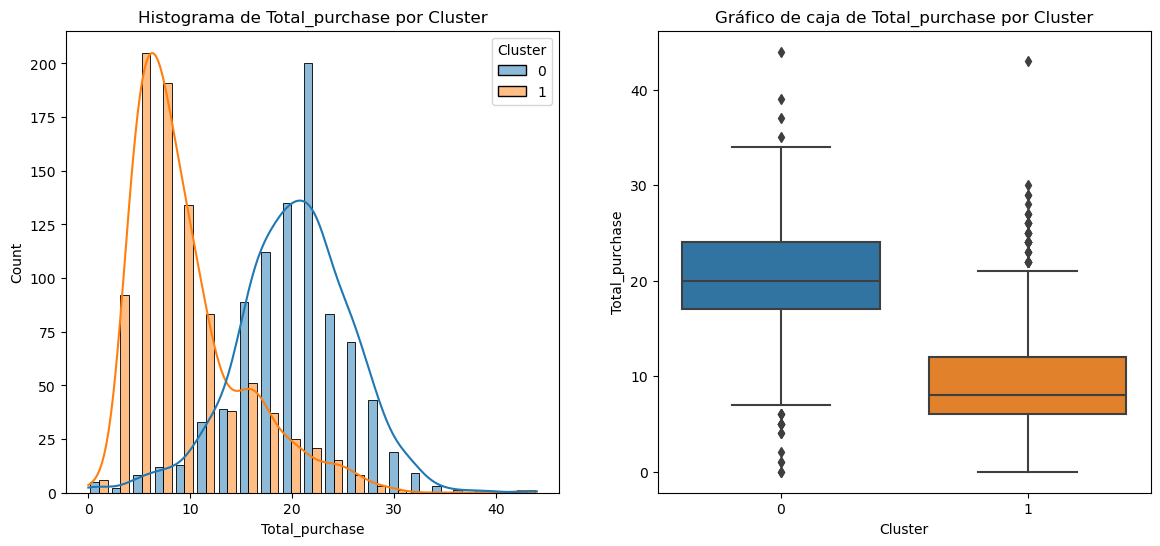

Estadísticos de resumen para Total_purchase por Cluster:
         count   mean   std  min   25%   50%   75%   max
Cluster                                                 
0        878.0  20.23  5.60  0.0  17.0  20.0  24.0  44.0
1        911.0   9.60  5.39  0.0   6.0   8.0  12.0  43.0

Prueba t-student para Total_purchase:
Estadístico t: -40.90
p-valor: 0.000
La variable Total_purchase está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de Total_cmp vs Cluster
****************************************


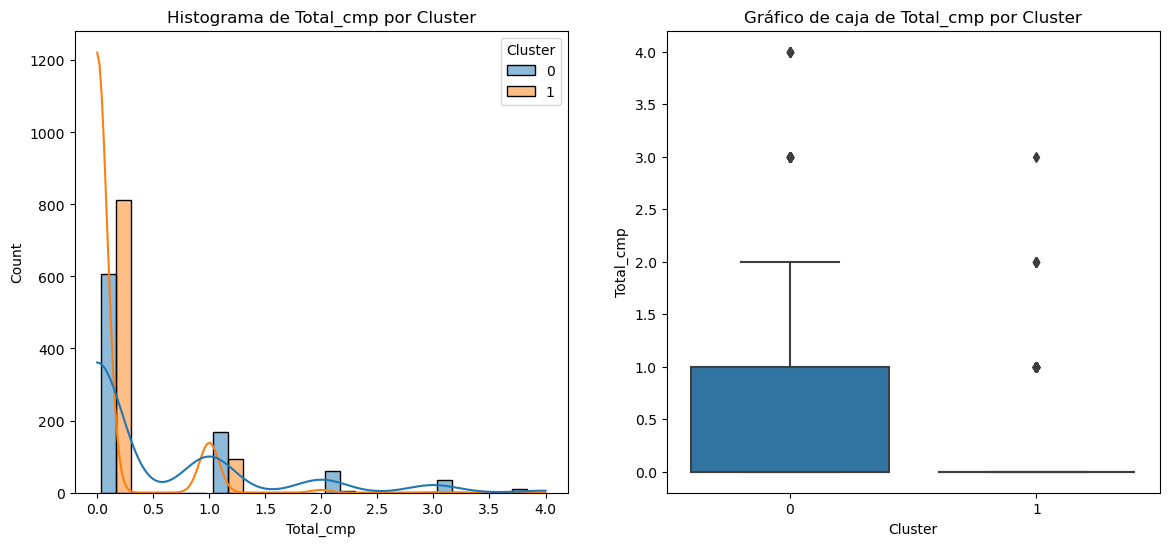

Estadísticos de resumen para Total_cmp por Cluster:
         count  mean   std  min  25%  50%  75%  max
Cluster                                            
0        878.0  0.49  0.87  0.0  0.0  0.0  1.0  4.0
1        911.0  0.12  0.35  0.0  0.0  0.0  0.0  3.0

Prueba t-student para Total_cmp:
Estadístico t: -12.06
p-valor: 0.000
La variable Total_cmp está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Las features correlacionadas son: ['Income', 'Kidhome', 'Teenhome', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'age', 'Household_members', 'Total_amount', 'Total_purchase', 'Total_cmp']
Las features NO correlacionadas son: ['Recency', 'NumDealsPurchases', 'AcceptedCmp3', 'Complain', 'customes_seniority']


In [219]:
target = 'Cluster'

analisis_bivariable_numericas_categorica(train_set,target,features_num)

### Análisis con las variables categóricas

Análisis de Education vs Cluster
****************************************


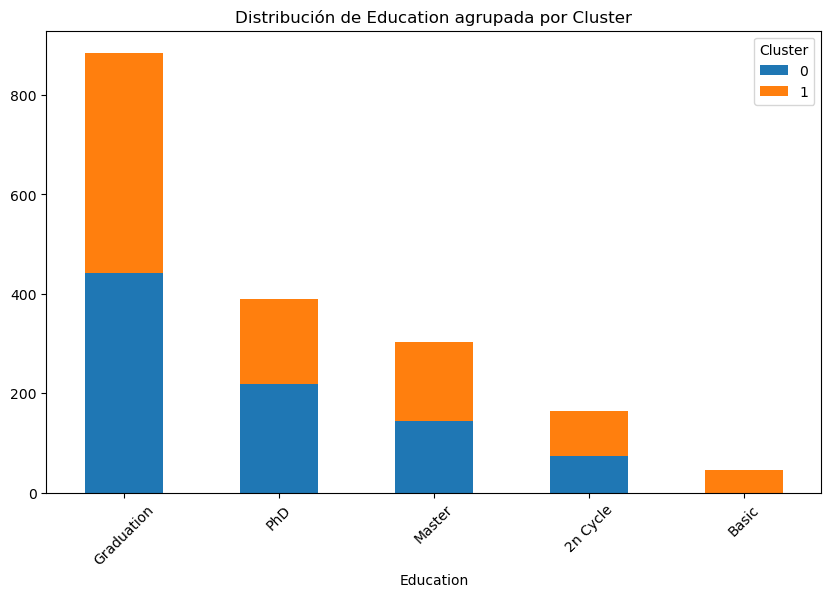

Tabla de contingencia de Education vs Cluster:
Cluster       0    1
Education           
Graduation  442  443
PhD         219  170
Master      144  160
2n Cycle     73   92
Basic         0   46

Tabla de porcentajes de Education respecto a Cluster:
Cluster             0          1
Education                       
Graduation  50.341686  48.627881
PhD         24.943052  18.660812
Master      16.400911  17.563117
2n Cycle     8.314351  10.098793
Basic        0.000000   5.049396

Tabla de frecuencias para Education:
            Frecuencia Absoluta  Frecuencia Relativa (%)
Education                                               
Graduation                  885                49.468977
PhD                         389                21.743991
Master                      304                16.992733
2n Cycle                    165                 9.223030
Basic                        46                 2.571269

Análisis de Marital_Status vs Cluster
****************************************


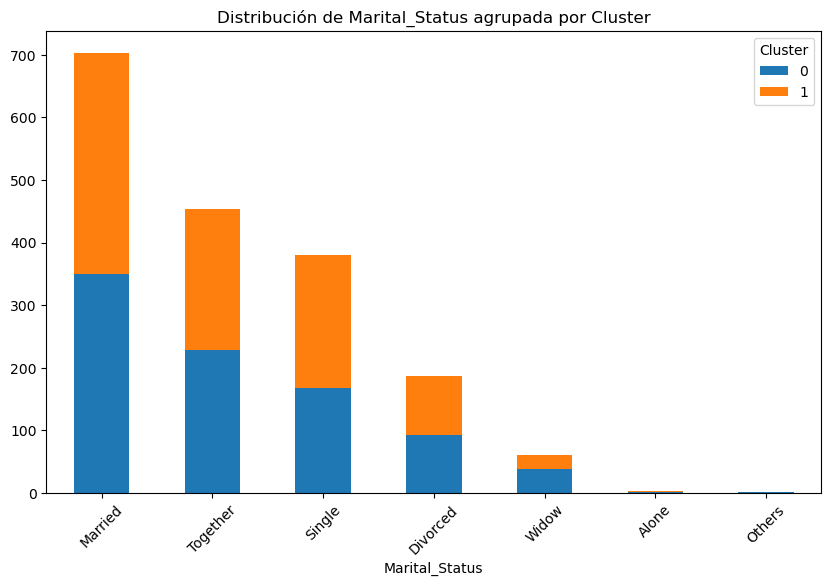

Tabla de contingencia de Marital_Status vs Cluster:
Cluster           0    1
Marital_Status          
Married         350  353
Together        228  225
Single          167  213
Divorced         92   95
Widow            38   23
Alone             1    2
Others            2    0

Tabla de porcentajes de Marital_Status respecto a Cluster:
Cluster                 0          1
Marital_Status                      
Married         39.863326  38.748628
Together        25.968109  24.698134
Single          19.020501  23.380900
Divorced        10.478360  10.428101
Widow            4.328018   2.524698
Alone            0.113895   0.219539
Others           0.227790   0.000000

Tabla de frecuencias para Marital_Status:
                Frecuencia Absoluta  Frecuencia Relativa (%)
Marital_Status                                              
Married                         703                39.295696
Together                        453                25.321409
Single                          380        

In [220]:
analisis_bivariable_categoricas_categorica(train_set,target,features_cat)

### Otros análisis

#### Cluster_0

In [221]:
cluster_0 = train_set.loc[train_set['Cluster']==0]
cluster_0.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Income,878.0,70123.54,13146.81,52157.0,60605.50,68719.0,77978.75,162397.0
Kidhome,878.0,0.16,0.40,0.0,0.00,0.0,0.00,2.0
Teenhome,878.0,0.55,0.56,0.0,0.00,1.0,1.00,2.0
Recency,878.0,49.12,29.18,0.0,24.00,51.0,73.00,99.0
MntWines,878.0,538.17,324.00,1.0,291.25,491.0,742.50,1493.0
MntFruits,878.0,46.07,47.34,0.0,10.00,28.0,68.00,199.0
MntMeatProducts,878.0,300.88,247.64,1.0,108.00,231.0,431.75,1622.0
MntFishProducts,878.0,65.42,64.96,0.0,13.00,42.0,100.50,259.0
MntSweetProducts,878.0,47.11,49.24,0.0,9.00,30.0,72.00,262.0
MntGoldProds,878.0,65.63,58.06,0.0,22.00,44.5,93.75,249.0


In [222]:
cluster_0['Marital_Status'].value_counts(normalize=True).round(2)

Marital_Status
Married     0.40
Together    0.26
Single      0.19
Divorced    0.10
Widow       0.04
Others      0.00
Alone       0.00
Name: proportion, dtype: float64

In [223]:
cluster_0['Education'].value_counts(normalize=True).round(2)

Education
Graduation    0.50
PhD           0.25
Master        0.16
2n Cycle      0.08
Basic         0.00
Name: proportion, dtype: float64

#### Cluster_1

In [224]:
cluster_1 = train_set.loc[train_set['Cluster']==1]
cluster_1.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Income,911.0,34099.12,11073.93,1730.0,26488.5,35178.0,42854.0,52074.0
Kidhome,911.0,0.73,0.51,0.0,0.0,1.0,1.0,2.0
Teenhome,911.0,0.46,0.54,0.0,0.0,0.0,1.0,2.0
Recency,911.0,49.00,28.83,0.0,24.0,49.0,75.0,99.0
MntWines,911.0,76.84,130.72,0.0,9.0,25.0,81.0,1181.0
MntFruits,911.0,7.05,13.75,0.0,1.0,3.0,8.0,151.0
MntMeatProducts,911.0,36.57,71.41,0.0,9.0,17.0,44.0,1725.0
MntFishProducts,911.0,11.02,21.77,0.0,2.0,4.0,12.0,208.0
MntSweetProducts,911.0,7.44,16.49,0.0,1.0,3.0,8.0,263.0
MntGoldProds,911.0,22.43,34.52,0.0,4.0,12.0,26.0,362.0


In [225]:
cluster_1['Marital_Status'].value_counts(normalize=True).round(2)

Marital_Status
Married     0.39
Together    0.25
Single      0.23
Divorced    0.10
Widow       0.03
Alone       0.00
Others      0.00
Name: proportion, dtype: float64

In [226]:
cluster_1['Education'].value_counts(normalize=True).round(2)

Education
Graduation    0.49
PhD           0.19
Master        0.18
2n Cycle      0.10
Basic         0.05
Name: proportion, dtype: float64

#### Cluster_2

In [ ]:
cluster_2 = train_set.loc[train_set['Cluster']==2]
cluster_2.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Income,634.0,28674.61,8670.72,1730.0,22804.00,30279.0,35860.00,41275.0
Kidhome,634.0,0.80,0.48,0.0,1.00,1.0,1.00,2.0
Teenhome,634.0,0.32,0.49,0.0,0.00,0.0,1.00,2.0
Recency,634.0,48.93,28.05,0.0,25.00,49.0,74.00,99.0
MntWines,634.0,33.56,50.46,0.0,6.00,15.0,36.75,424.0
MntFruits,634.0,6.12,12.74,0.0,1.00,3.0,6.00,151.0
MntMeatProducts,634.0,27.26,74.96,0.0,7.25,14.0,25.00,1725.0
MntFishProducts,634.0,9.07,18.67,0.0,2.00,4.0,11.00,208.0
MntSweetProducts,634.0,6.52,15.67,0.0,1.00,3.0,7.00,263.0
MntGoldProds,634.0,18.82,32.87,0.0,4.00,10.0,20.75,362.0


In [ ]:
cluster_2['Marital_Status'].value_counts(normalize=True).round(2)

Marital_Status
Married     0.39
Together    0.24
Single      0.24
Divorced    0.10
Widow       0.02
Alone       0.00
Others      0.00
Name: proportion, dtype: float64

In [ ]:
cluster_2['Education'].value_counts(normalize=True).round(2)

Education
Graduation    0.50
PhD           0.17
Master        0.15
2n Cycle      0.11
Basic         0.07
Name: proportion, dtype: float64

#### Cluster_3

In [ ]:
cluster_3 = train_set.loc[train_set['Cluster']==3]
cluster_3.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Income,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kidhome,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Teenhome,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Recency,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MntWines,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MntFruits,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MntMeatProducts,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MntFishProducts,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MntSweetProducts,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MntGoldProds,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cluster_3['Marital_Status'].value_counts(normalize=True).round(2)

Marital_Status
Alone      NaN
Divorced   NaN
Married    NaN
Others     NaN
Single     NaN
Together   NaN
Widow      NaN
Name: proportion, dtype: float64

In [ ]:
cluster_3['Education'].value_counts(normalize=True).round(2)

Education
2n Cycle     NaN
Basic        NaN
Graduation   NaN
Master       NaN
PhD          NaN
Name: proportion, dtype: float64

for name in cluster_name:

In [227]:
cluster_name = [cluster_0,cluster_1]
dicc={}
for i,cluster in enumerate(cluster_name):
    print(i)
    print(cluster)
    temp = cluster.describe().T['50%'] 
    dicc[f'cluster_{i}']=temp
cluster_df = pd.DataFrame(dicc)

0
       Education Marital_Status   Income  Kidhome  Teenhome  Recency  \
ID                                                                     
5543  Graduation       Together  57811.0        0         1       49   
3011  Graduation        Married  69139.0        0         1       23   
535   Graduation       Divorced  81361.0        0         0       18   
5536  Graduation       Together  87771.0        0         1       61   
3830      Master        Married  59354.0        0         2       59   
...          ...            ...      ...      ...       ...      ...   
3759  Graduation       Together  65196.0        0         2       34   
1772         PhD        Married  79174.0        0         0        2   
4679      Master        Married  78710.0        0         1       42   
2894  Graduation         Single  72903.0        0         0       74   
6905  Graduation       Together  80685.0        0         0       55   

      MntWines  MntFruits  MntMeatProducts  MntFishProducts  

In [228]:
grafico_mnt = cluster_df.loc[cluster_df.index.str.contains('Mnt')]
grafico_mnt

,cluster_0,cluster_1
MntWines,491.0,25.0
MntFruits,28.0,3.0
MntMeatProducts,231.0,17.0
MntFishProducts,42.0,4.0
MntSweetProducts,30.0,3.0
MntGoldProds,44.5,12.0


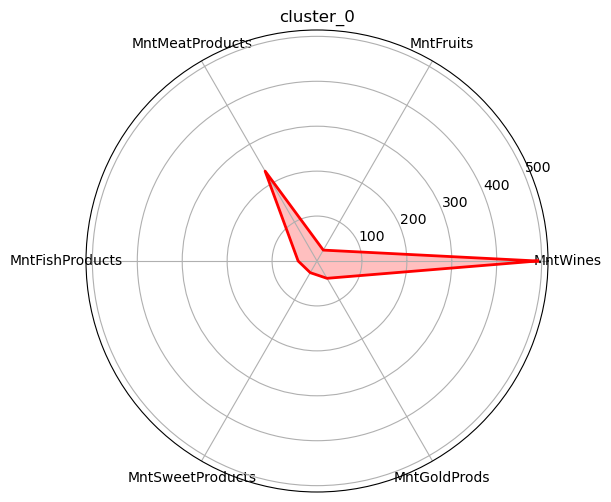

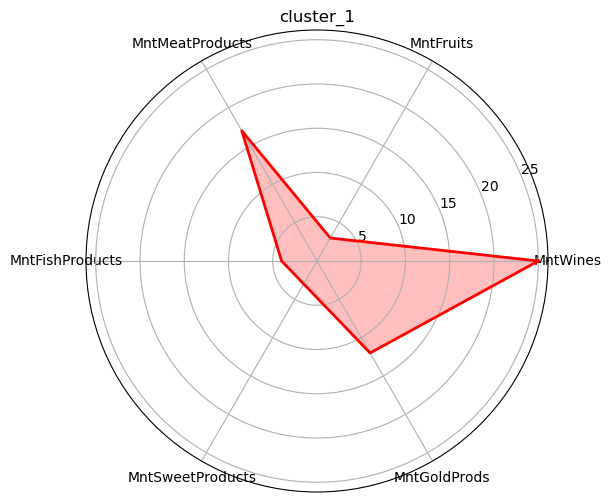

In [229]:
for elemento in grafico_mnt:
   stats= grafico_mnt[elemento].values.tolist()
   etiquetas = grafico_mnt.index.tolist()
   titulo = elemento
   crear_grafico_radar(stats,etiquetas, titulo)
   

In [230]:
stats_list = []
leyenda_multi = []
for elemento in grafico_mnt:
   temp_stats= grafico_mnt[elemento].values.tolist()
   temp_label = elemento
   stats_list.append(temp_stats)
   leyenda_multi.append(elemento)

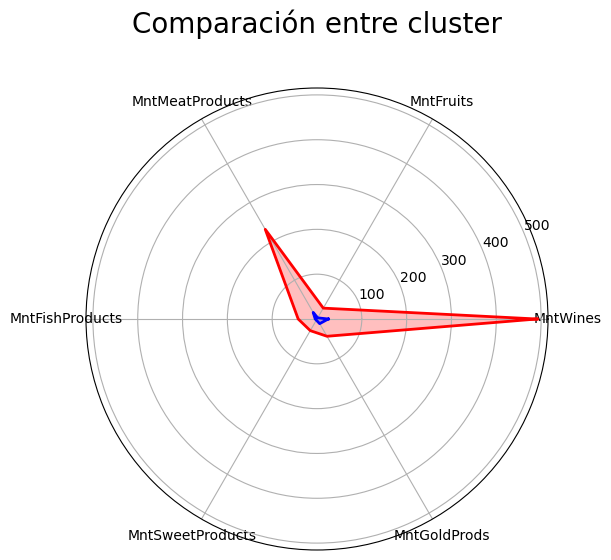

In [231]:
etiquetas_multi = grafico_mnt.index.to_list()
colores = ['red','blue', 'green']

crear_grafico_radar_multiples(stats_list,etiquetas_multi,colores,'Comparación entre cluster', leyenda_multi)